# Bike-Sharing System Case Study

### Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially the company wants:
- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Step 1: Reading and Understanding the Data

### 1.1 Reading the Bike sharing dataset

In [4115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4116]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.2 Inspecting the Dataset

In [4118]:
df.shape

(730, 16)

In [4119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4120]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### 1.3 Data Quality Check

#### 1.3.1 Checking for NULL/MISSING values

In [4123]:
# percentage of missing values in each column

df.isnull().mean().sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [4124]:
# percentage of missing values in each row

round((df.isnull().sum(axis=1)/len(df))*100, 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

### <font color = 'red'> Inferences</font> : 
No missing/NULL values found

#### 1.3.2 Checking for DUPLICATE values

In [4127]:
df_duplicate = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_duplicate.drop_duplicates(subset=None, inplace=True)

print("original df shape:", df.shape, "\nduplicate df shape:", df_duplicate.shape)

original df shape: (730, 16) 
duplicate df shape: (730, 16)


### <font color = 'red'> Inferences: </font> 
Duplicate values are not present

#### 1.3.3 Identify any UNKNOWN/JUNK values

Checking value_counts() for entire dataframe.

This will help to identify any Unknown/Junk values present in the dataset.

In [4130]:
# Create a copy of the  dataframe, without the 'instant' column,as this will have unique values, and donot make sense to do a value count on it.

df_copy = df.iloc[:,1:16]

for col in df_copy:
    print(df_copy[col].value_counts(ascending=False), '\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 



workingday
1    499
0    231
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

### <font color = 'red'> Inferences: </font> 
There seems to be no Junk/Unknown values in the entire dataset.

### 1.4 Data Cleaning

#### 1.4.1 Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

- instant : Its only an index value , we have a default index for the same purpose

- dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can carry out our analysis without this column .

- casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

We will save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation

In [4135]:
df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

df.shape

(730, 12)

## Step 2: EDA - Visualising the Data

#### Here, we'll accomplish the following tasks:
- Determine whether all variables have a linear relationship, which is crucial for deciding if a linear model is suitable.
- Check for any presence of multicollinearity among predictors.
- Identify predictors that might have a strong direct correlation with the outcome variable.

We'll visualise our data using `matplotlib` and `seaborn`.

In [4138]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 Categorize numeric and categorical variables

In [4140]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [4141]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [4142]:
numeric_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### 2.2 Visualising Numeric Variables : Using a pairplot

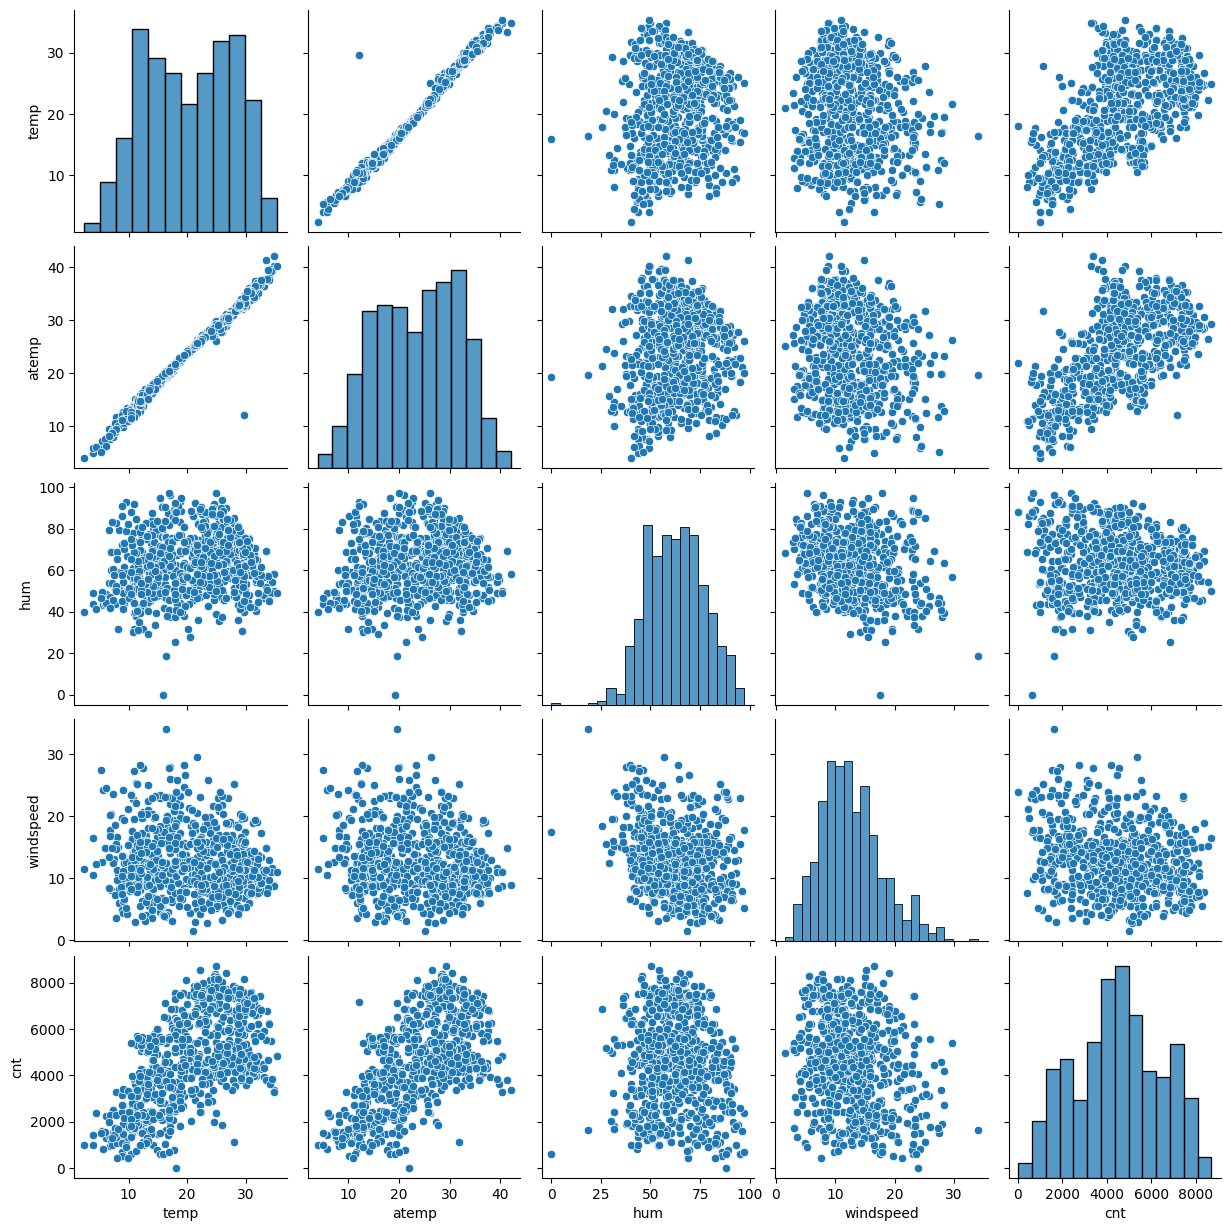

In [4144]:
sns.pairplot(df[numeric_var])
plt.show()

### <font color = 'red'> Conclusion : </font>
By visualizing the numeric variables, we can conclude that a linear model may be appropriate here, as at least some independent variables, such as $atemp$ and $temp$, show a positive correlation with the target variable $cnt$.  

### 2.3 Visualising Categorical Variables : Using a Boxplot

#### 2.3.1 Labeling Categorical values

Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [4147]:
import calendar

# Maping seasons
df["season"] = df["season"].map({ 1: "spring", 2: "summer", 3: "fall", 4: "winter" }).astype(str)

# Maping mnth
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])

# Mapping weekday
df["weekday"] = df["weekday"].map({ 0: "sunday", 1: "monday", 2: "tuesday", 3: "wednesday", 4: "thursday", 5: "friday", 6: "saturday" }).astype(str)

# Mapping weathersit
df["weathersit"] = df["weathersit"].map({ 1: "clear", 2: "misty", 3: "light rain", 4: "heavy rain" }).astype(str)


In [4148]:
df[categorical_var].head()

,season,yr,mnth,holiday,weekday,workingday,weathersit
0,spring,0,Jan,0,saturday,0,misty
1,spring,0,Jan,0,sunday,0,misty
2,spring,0,Jan,0,monday,1,clear
3,spring,0,Jan,0,tuesday,1,clear
4,spring,0,Jan,0,wednesday,1,clear


#### 2.3.2 Visualising Categorical Variables : Using a Boxplot

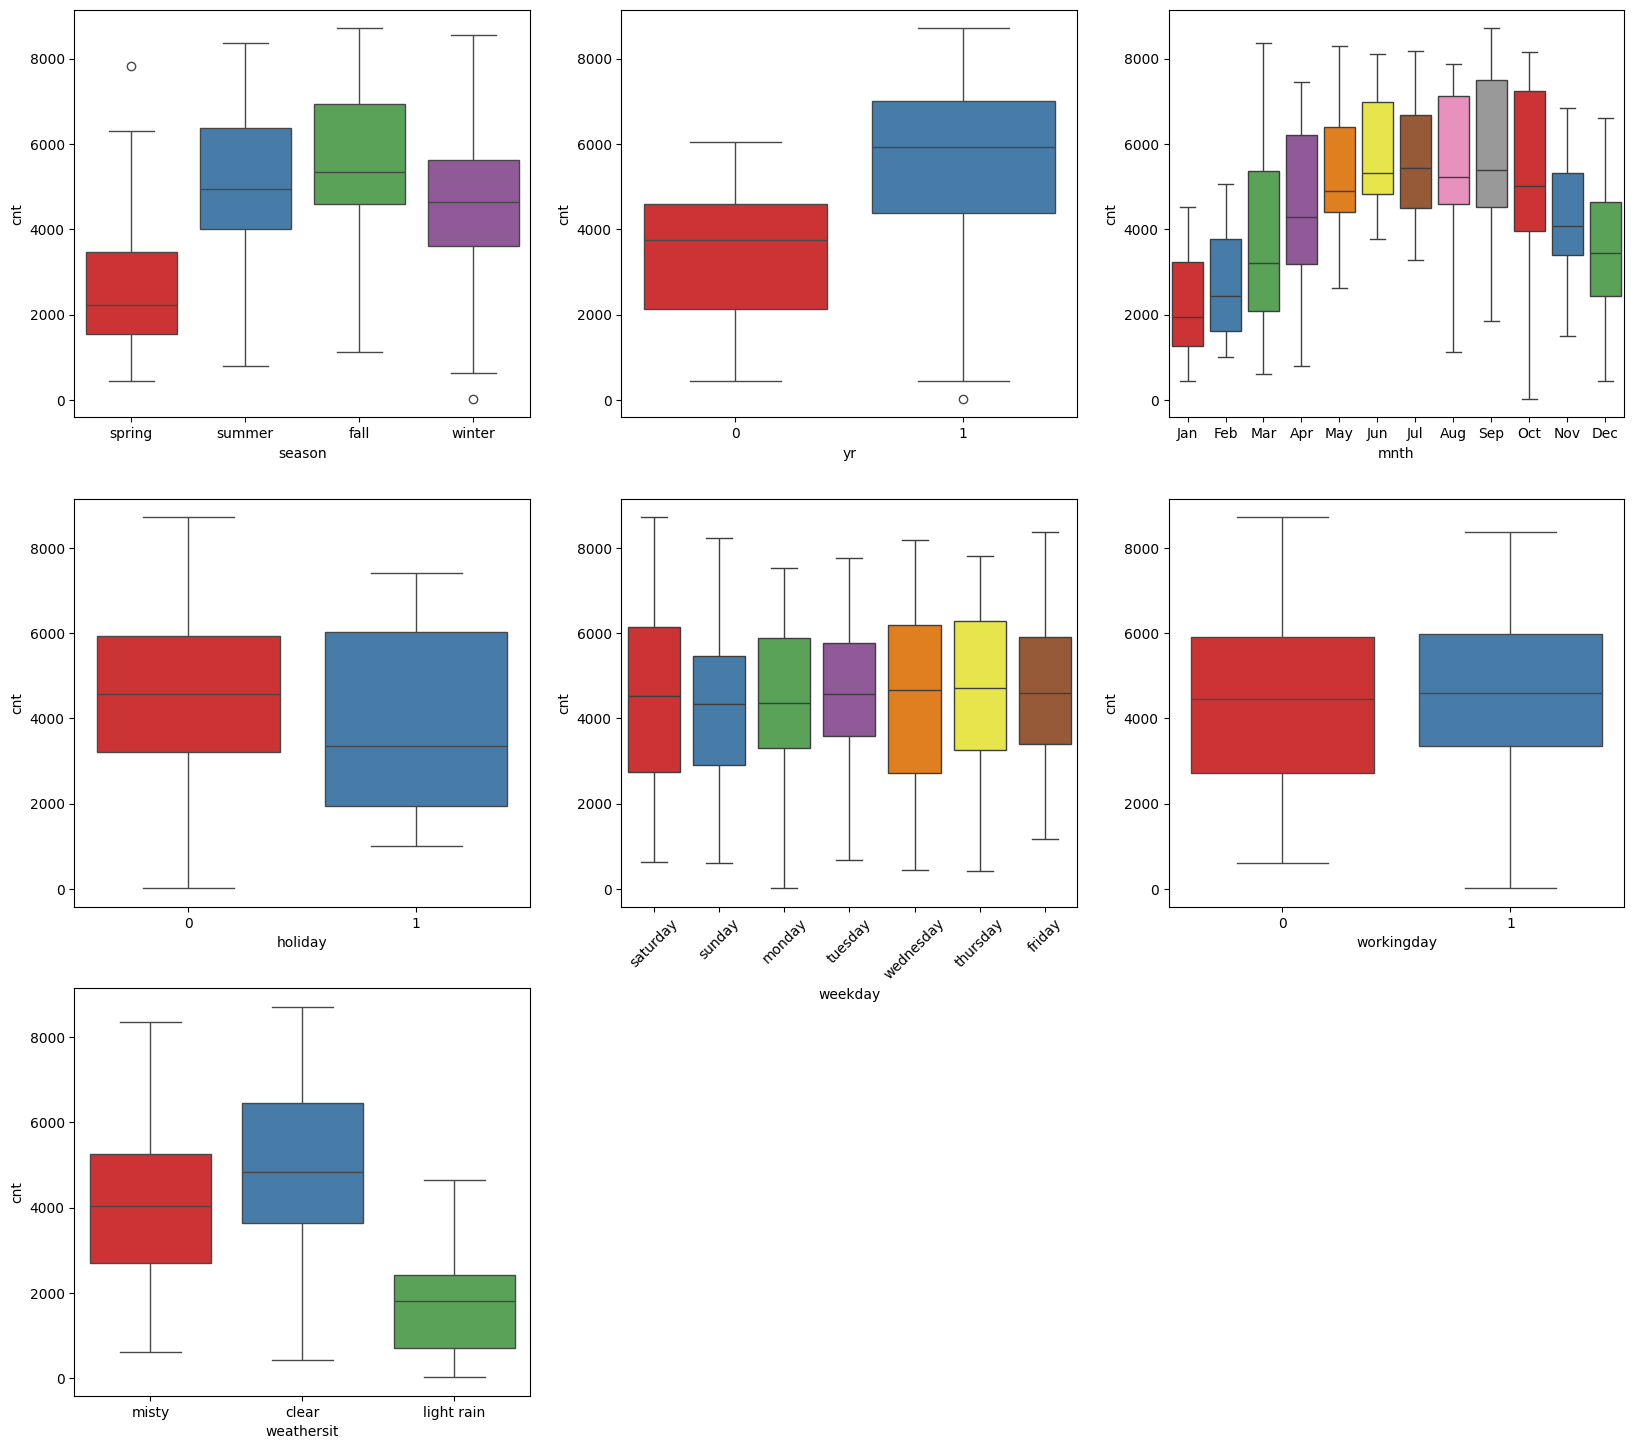

In [4150]:
plt.figure(figsize=(20,18))

plt.subplot(3,3,1)
sns.boxplot(x="season", y="cnt", hue="season", data=df, palette="Set1", legend=False)

plt.subplot(3,3,2)
sns.boxplot(x="yr", y="cnt", hue="yr", data=df, palette="Set1", legend=False)

plt.subplot(3,3,3)
sns.boxplot(x="mnth", y="cnt", hue="mnth", data=df, palette="Set1", legend=False)

plt.subplot(3,3,4)
sns.boxplot(x="holiday", y="cnt", hue="holiday", data=df, palette="Set1", legend=False)

plt.subplot(3,3,5)
sns.boxplot(x="weekday", y="cnt", hue="weekday", data=df, palette="Set1", legend=False)
plt.xticks(rotation=45)

plt.subplot(3,3,6)
sns.boxplot(x="workingday", y="cnt", hue="workingday", data=df, palette="Set1", legend=False)

plt.subplot(3,3,7)
sns.boxplot(x="weathersit", y="cnt", hue="weathersit", data=df, palette="Set1", legend=False)

plt.show()

### <font color = 'red'> Conslusions: </font>
The graph provides a clear view of the qualitative distributions of the data, enhancing confidence in model predictions when key predictors are identified.
- For the variable season, "fall" shows the highest median, indicating higher demand during this season, while "spring" shows the lowest.
- User count was higher in 2019 compared to 2018.
- Bike demand remains relatively constant throughout the week.
- Total user count ranges between 4000 to 6000 (~5500) during clear weather.
- August experiences the highest user count.
- User count decreases during holidays.

## Step 3: Data Preparation

### 3.1 Creating Dummy Variables

In [4154]:
df_dummies = pd.get_dummies(df, columns=["season", "mnth", "weekday", "weathersit"], drop_first=True, dtype=int)

df_dummies.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light rain,weathersit_misty
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [4155]:
df_dummies.shape

(730, 30)

In [4156]:
df_dummies.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'weathersit_light rain',
       'weathersit_misty'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets
The first basic step for regression is performing a train-test split.

In [4158]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_dummies, train_size=0.7, test_size=0.3, random_state=100)

print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


## Step 5: Rescaling the Features

Although scaling doesn’t affect simple linear regression, it can have an impact in multiple linear regression. Here, the feature cnt has much larger values than other features like temp and atemp, making it crucial to rescale the variables for a comparable scale. Without rescaling, some coefficients in the regression model could be disproportionately large or small, complicating model evaluation. To avoid this, standardization or normalization is recommended, ensuring coefficients are on a consistent scale. The two most common scaling methods are:

- Min-Max Scaling
- Standardization (mean = 0, standard deviation = 1)

In this case, we’ll use Min-Max scaling.

In [4161]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables.
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light rain,weathersit_misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [4162]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light rain,weathersit_misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 6: Model Building

APPROACH USED :

We will use a mixed approach to build the model.

Here we are using `RFE` approach for feature selection and then we will use the `statsmodel` approach for building the model 

### 6.1 Checking the coefficients to see which variables are highly correlated

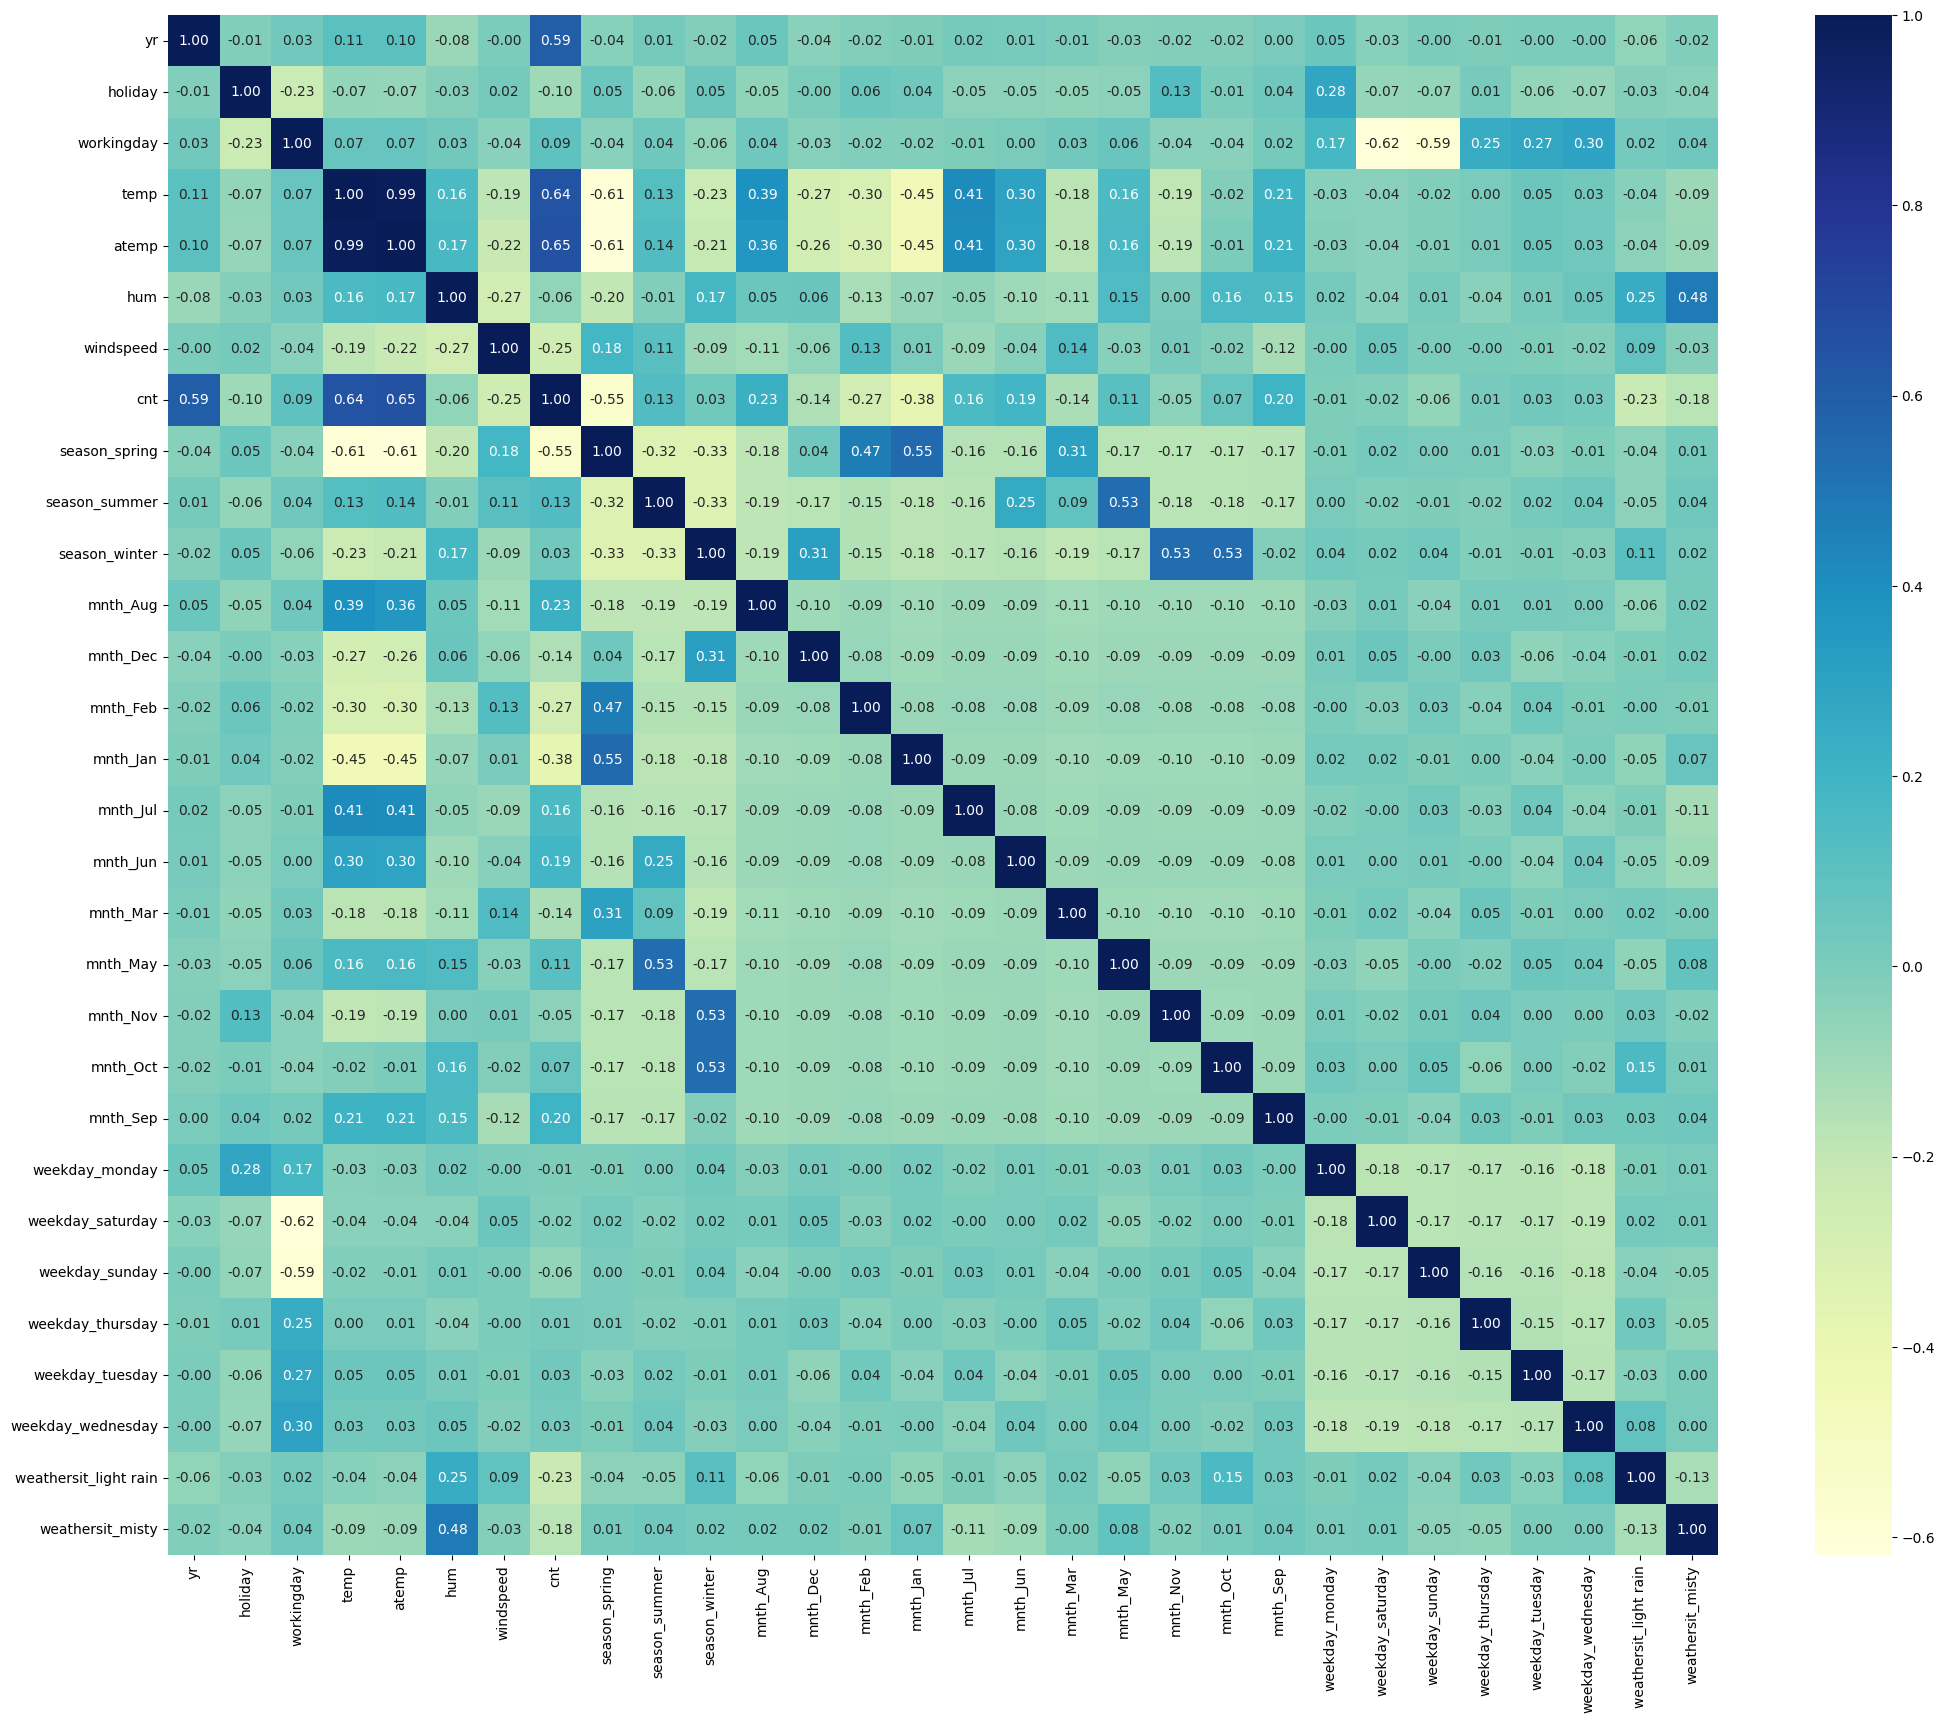

In [4165]:
plt.figure(figsize=(25,20))
sns.heatmap(df_train.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
plt.show()

### <font color = 'red'> Conclusion: </font>
From the map, we can observe that `atemp` and `temp` appear to be correlated with the target variable, `cnt`. Since the relationship of other independent variables with `cnt` is less clear, we'll proceed by building a model that includes all columns.

### 6.2 Dividing into X and Y sets for the model building

- Target variable on y and independent variables on X

In [4168]:
y_train = df_train.pop('cnt')
X_train = df_train

In [4169]:
X_train.shape

(510, 29)

In [4170]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'weathersit_light rain',
       'weathersit_misty'],
      dtype='object')

In [4171]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

### 6.3 Feature Selection

In [4173]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [4174]:
lm = LinearRegression()

selector = RFE(lm, n_features_to_select=20)
selector = selector.fit(X_train, y_train)

In [4175]:
list(zip(X_train.columns, selector.support_, selector.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 9),
 ('mnth_Mar', False, 10),
 ('mnth_May', False, 2),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 6),
 ('mnth_Sep', True, 1),
 ('weekday_monday', False, 4),
 ('weekday_saturday', True, 1),
 ('weekday_sunday', True, 1),
 ('weekday_thursday', False, 7),
 ('weekday_tuesday', False, 5),
 ('weekday_wednesday', False, 8),
 ('weathersit_light rain', True, 1),
 ('weathersit_misty', True, 1)]

In [4176]:
selected_features = X_train.columns[selector.support_]

selected_features

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_saturday', 'weekday_sunday', 'weathersit_light rain',
       'weathersit_misty'],
      dtype='object')

In [4177]:
# Creating X_test dataframe with RFE selected variables

X_train = X_train[selected_features]

In [4178]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Nov', 'mnth_Sep',
       'weekday_saturday', 'weekday_sunday', 'weathersit_light rain',
       'weathersit_misty'],
      dtype='object')

In [4179]:
X_train.shape

(510, 20)

### 6.4 Building model using statsmodel, for the detailed statistics

#### 6.4.1 Adding a constant variable 
For statsmodels, we need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [4182]:
import statsmodels.api as sm

# Adding a constant variable
X_train_sm = sm.add_constant(X_train)

# Running the linear model
lm1 = sm.OLS(y_train, X_train_sm).fit()

In [4183]:
# Check the parameters obtained
lm1.params

const                    0.239722
yr                       0.231128
holiday                 -0.002063
workingday               0.092092
temp                     0.442226
atemp                    0.018631
hum                     -0.145821
windspeed               -0.188006
season_spring           -0.052216
season_summer            0.037307
season_winter            0.103013
mnth_Dec                -0.049169
mnth_Feb                -0.033925
mnth_Jan                -0.063915
mnth_Jul                -0.051876
mnth_Nov                -0.046570
mnth_Sep                 0.071606
weekday_saturday         0.101958
weekday_sunday           0.047735
weathersit_light rain   -0.258090
weathersit_misty        -0.060002
dtype: float64

In [4184]:
#Summary of the linear model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.47e-189
Time:                        23:39:21   Log-Likelihood:                 525.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2397      0.030      8.111      0.000       0.182       0.298
yr                        0.2311      0.008     29.052      0.000       0.215       0.247
holiday                  -0.0021      0.022     -0.095      0.924      -0.045       0.041
workingday                0.0921      0.010      9.369      0.000       0.073       0.111
temp                      0.4422      0.133      3.323      0.001       0.181       0.704
atemp                     0.0186      0.135      0.138      0.890      -0.247       0.284
hum                      -0.1458      0.037     -3.902      0.000      -0.219      -0.072
windspeed                -0.1880      0.026     -7.267      0.000      -0.239      -0.137
season_spring            -0.0522      0.022     -2.384      0.018      -0.095      -0.009
season_summer             0.0373      0.016      2.404      0.017       0.007       0.068
season_winter             0.1030      0.018      5.720      0.000       0.068       0.138
mnth_Dec                 -0.0492      0.018     -2.725      0.007      -0.085      -0.014
mnth_Feb                 -0.0339      0.021     -1.588      0.113      -0.076       0.008
mnth_Jan                 -0.0639      0.021     -3.017      0.003      -0.106      -0.022
mnth_Jul                 -0.0519      0.018     -2.883      0.004      -0.087      -0.017
mnth_Nov                 -0.0466      0.019     -2.497      0.013      -0.083      -0.010
mnth_Sep                  0.0716      0.017      4.297      0.000       0.039       0.104
weekday_saturday          0.1020      0.012      8.659      0.000       0.079       0.125
weekday_sunday            0.0477      0.012      3.879      0.000       0.024       0.072
weathersit_light rain    -0.2581      0.026     -9.880      0.000      -0.309      -0.207
weathersit_misty         -0.0600      0.010     -5.801      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       81.677   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.847
Skew:                          -0.789   Prob(JB):                     1.82e-48
Kurtosis:                       5.803   Cond. No.                     8.84e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.12e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### <font color = 'red'> Conclusion : </font>
Here we see that the p-value `holiday` is `0.924` which is `> 0.05` . Hence, we keep drop this column and re-build the model. 

In [4186]:
X_train_sm = X_train_sm.drop('holiday', axis=1)

lm2 = sm.OLS(y_train, X_train_sm).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.47e-189
Time:                        23:39:21   Log-Likelihood:                 525.16
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2377      0.045      5.330      0.000       0.150       0.325
yr                        0.2311      0.008     29.052      0.000       0.215       0.247
workingday                0.0942      0.025      3.710      0.000       0.044       0.144
temp                      0.4422      0.133      3.323      0.001       0.181       0.704
atemp                     0.0186      0.135      0.138      0.890      -0.247       0.284
hum                      -0.1458      0.037     -3.902      0.000      -0.219      -0.072
windspeed                -0.1880      0.026     -7.267      0.000      -0.239      -0.137
season_spring            -0.0522      0.022     -2.384      0.018      -0.095      -0.009
season_summer             0.0373      0.016      2.404      0.017       0.007       0.068
season_winter             0.1030      0.018      5.720      0.000       0.068       0.138
mnth_Dec                 -0.0492      0.018     -2.725      0.007      -0.085      -0.014
mnth_Feb                 -0.0339      0.021     -1.588      0.113      -0.076       0.008
mnth_Jan                 -0.0639      0.021     -3.017      0.003      -0.106      -0.022
mnth_Jul                 -0.0519      0.018     -2.883      0.004      -0.087      -0.017
mnth_Nov                 -0.0466      0.019     -2.497      0.013      -0.083      -0.010
mnth_Sep                  0.0716      0.017      4.297      0.000       0.039       0.104
weekday_saturday          0.1040      0.027      3.875      0.000       0.051       0.157
weekday_sunday            0.0498      0.027      1.848      0.065      -0.003       0.103
weathersit_light rain    -0.2581      0.026     -9.880      0.000      -0.309      -0.207
weathersit_misty         -0.0600      0.010     -5.801      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       81.677   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.847
Skew:                          -0.789   Prob(JB):                     1.82e-48
Kurtosis:                       5.803   Cond. No.                         86.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = 'red'> Conclusion : </font>
Here we see that the p-value `atemp` is `0.890` which is `> 0.05` . Hence, we keep drop this column and re-build the model. 

In [4188]:
X_train_sm = X_train_sm.drop('atemp', axis=1)

lm3 = sm.OLS(y_train, X_train_sm).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          3.55e-190
Time:                        23:39:21   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2374      0.044      5.335      0.000       0.150       0.325
yr                        0.2311      0.008     29.082      0.000       0.215       0.247
workingday                0.0943      0.025      3.722      0.000       0.045       0.144
temp                      0.4598      0.038     12.233      0.000       0.386       0.534
hum                      -0.1456      0.037     -3.904      0.000      -0.219      -0.072
windspeed                -0.1887      0.025     -7.440      0.000      -0.239      -0.139
season_spring            -0.0518      0.022     -2.390      0.017      -0.094      -0.009
season_summer             0.0377      0.015      2.483      0.013       0.008       0.068
season_winter             0.1035      0.018      5.852      0.000       0.069       0.138
mnth_Dec                 -0.0491      0.018     -2.727      0.007      -0.085      -0.014
mnth_Feb                 -0.0339      0.021     -1.591      0.112      -0.076       0.008
mnth_Jan                 -0.0640      0.021     -3.025      0.003      -0.106      -0.022
mnth_Jul                 -0.0517      0.018     -2.883      0.004      -0.087      -0.016
mnth_Nov                 -0.0465      0.019     -2.499      0.013      -0.083      -0.010
mnth_Sep                  0.0718      0.017      4.319      0.000       0.039       0.104
weekday_saturday          0.1042      0.027      3.886      0.000       0.051       0.157
weekday_sunday            0.0499      0.027      1.857      0.064      -0.003       0.103
weathersit_light rain    -0.2583      0.026     -9.924      0.000      -0.309      -0.207
weathersit_misty         -0.0600      0.010     -5.813      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       81.478   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.245
Skew:                          -0.787   Prob(JB):                     2.46e-48
Kurtosis:                       5.800   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = 'red'> Conclusion : </font>
Here we see that the p-value `weekday_sunday` is `0.064` which is `> 0.05` . Hence, we keep drop this column and re-build the model. 

In [4190]:
X_train_sm = X_train_sm.drop('weekday_sunday', axis=1)

lm4 = sm.OLS(y_train, X_train_sm).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.8
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.50e-190
Time:                        23:39:21   Log-Likelihood:                 523.37
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     492   BIC:                            -934.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2817      0.038      7.487      0.000       0.208       0.356
yr                        0.2313      0.008     29.042      0.000       0.216       0.247
workingday                0.0517      0.011      4.805      0.000       0.031       0.073
temp                      0.4571      0.038     12.138      0.000       0.383       0.531
hum                      -0.1441      0.037     -3.855      0.000      -0.217      -0.071
windspeed                -0.1892      0.025     -7.441      0.000      -0.239      -0.139
season_spring            -0.0529      0.022     -2.434      0.015      -0.096      -0.010
season_summer             0.0373      0.015      2.448      0.015       0.007       0.067
season_winter             0.1034      0.018      5.834      0.000       0.069       0.138
mnth_Dec                 -0.0506      0.018     -2.803      0.005      -0.086      -0.015
mnth_Feb                 -0.0359      0.021     -1.679      0.094      -0.078       0.006
mnth_Jan                 -0.0659      0.021     -3.113      0.002      -0.108      -0.024
mnth_Jul                 -0.0507      0.018     -2.821      0.005      -0.086      -0.015
mnth_Nov                 -0.0508      0.019     -2.744      0.006      -0.087      -0.014
mnth_Sep                  0.0694      0.017      4.181      0.000       0.037       0.102
weekday_saturday          0.0616      0.014      4.431      0.000       0.034       0.089
weathersit_light rain    -0.2581      0.026     -9.891      0.000      -0.309      -0.207
weathersit_misty         -0.0599      0.010     -5.784      0.000      -0.080      -0.040
==============================================================================
Omnibus:                       87.977   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.249
Skew:                          -0.832   Prob(JB):                     1.24e-54
Kurtosis:                       5.985   Cond. No.                         23.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = 'red'> Conclusion : </font>
Here we see that the p-value `mnth_Feb` is `0.094` which is `> 0.05` . Hence, we keep drop this column and re-build the model. 

In [4192]:
X_train_sm = X_train_sm.drop('mnth_Feb', axis=1)

lm5 = sm.OLS(y_train, X_train_sm).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.3
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.53e-191
Time:                        23:39:21   Log-Likelihood:                 521.91
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     493   BIC:                            -937.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2694      0.037      7.286      0.000       0.197       0.342
yr                        0.2310      0.008     28.956      0.000       0.215       0.247
workingday                0.0522      0.011      4.847      0.000       0.031       0.073
temp                      0.4729      0.037     12.953      0.000       0.401       0.545
hum                      -0.1459      0.037     -3.899      0.000      -0.219      -0.072
windspeed                -0.1880      0.025     -7.384      0.000      -0.238      -0.138
season_spring            -0.0628      0.021     -2.999      0.003      -0.104      -0.022
season_summer             0.0406      0.015      2.683      0.008       0.011       0.070
season_winter             0.1052      0.018      5.935      0.000       0.070       0.140
mnth_Dec                 -0.0415      0.017     -2.405      0.017      -0.075      -0.008
mnth_Jan                 -0.0468      0.018     -2.617      0.009      -0.082      -0.012
mnth_Jul                 -0.0516      0.018     -2.870      0.004      -0.087      -0.016
mnth_Nov                 -0.0462      0.018     -2.517      0.012      -0.082      -0.010
mnth_Sep                  0.0708      0.017      4.263      0.000       0.038       0.103
weekday_saturday          0.0627      0.014      4.513      0.000       0.035       0.090
weathersit_light rain    -0.2568      0.026     -9.826      0.000      -0.308      -0.205
weathersit_misty         -0.0596      0.010     -5.749      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.201   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.988
Skew:                          -0.790   Prob(JB):                     2.55e-51
Kurtosis:                       5.910   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### <font color = 'red'> Conclusion : </font>
Here we see that the p-value for all the variables is < 0.05 . Hence, we keep all the columns and proceed with the model. 

#### 6.4.4 Checking VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [4195]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

# If the VIF (Variance Inflation Factor) for holiday (or any other variable) is coming out as infinity (inf), 
# it likely indicates perfect multicollinearity—meaning that the holiday variable is highly correlated with one or more of the 
# other variables in your dataset.

,Features,VIF
0,const,89.12
6,season_spring,5.26
3,temp,4.42
8,season_winter,3.83
7,season_summer,2.76
4,hum,1.94
12,mnth_Nov,1.73
10,mnth_Jan,1.68
2,workingday,1.66
14,weekday_saturday,1.65


#### We generally want a VIF that is less than 5. The VIF of `season_spring` is `5.26` which is `> 5`. Hence we drop this column and proceed with re-building the model.

In [4197]:
X_train_sm = X_train_sm.drop('season_spring', axis=1)

lm6 = sm.OLS(y_train, X_train_sm).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.4
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.78e-190
Time:                        23:39:21   Log-Likelihood:                 517.30
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     494   BIC:                            -934.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2036      0.030      6.787      0.000       0.145       0.263
yr                        0.2296      0.008     28.599      0.000       0.214       0.245
workingday                0.0530      0.011      4.879      0.000       0.032       0.074
temp                      0.5483      0.027     20.520      0.000       0.496       0.601
hum                      -0.1581      0.038     -4.216      0.000      -0.232      -0.084
windspeed                -0.1967      0.025     -7.713      0.000      -0.247      -0.147
season_summer             0.0720      0.011      6.543      0.000       0.050       0.094
season_winter             0.1412      0.013     10.729      0.000       0.115       0.167
mnth_Dec                 -0.0354      0.017     -2.052      0.041      -0.069      -0.002
mnth_Jan                 -0.0508      0.018     -2.824      0.005      -0.086      -0.015
mnth_Jul                 -0.0413      0.018     -2.319      0.021      -0.076      -0.006
mnth_Nov                 -0.0364      0.018     -1.998      0.046      -0.072      -0.001
mnth_Sep                  0.0859      0.016      5.382      0.000       0.055       0.117
weekday_saturday          0.0635      0.014      4.529      0.000       0.036       0.091
weathersit_light rain    -0.2504      0.026     -9.536      0.000      -0.302      -0.199
weathersit_misty         -0.0567      0.010     -5.446      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       73.764   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              178.061
Skew:                          -0.751   Prob(JB):                     2.16e-39
Kurtosis:                       5.475   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4198]:
vif = pd.DataFrame()
vif["Features"] = X_train_sm.columns
vif["VIF"] = [variance_inflation_factor(X_train_sm.values, i) for i in range(len(X_train_sm.columns))]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
0,const,57.71
3,temp,2.33
7,season_winter,2.08
4,hum,1.92
11,mnth_Nov,1.68
9,mnth_Jan,1.67
2,workingday,1.65
13,weekday_saturday,1.65
15,weathersit_misty,1.57
8,mnth_Dec,1.48


### <font color = 'red'> Conclusion : </font>
Here we see that the p-value for all the variables is < 0.05 and VIF for all the variables < 5. Hence, we keep all the columns and proceed with the model.

## Step 7: Residual Analysis of the train data

### 7.1 Prediction using the final model

Next, we will check whether the error terms are normally distributed, as this is one of the key assumptions of linear regression. To do this, we'll plot a histogram of the error terms and examine its shape.

In [4202]:
y_train_pred = lm6.predict(X_train_sm)

Text(0.5, 0, 'Errors')

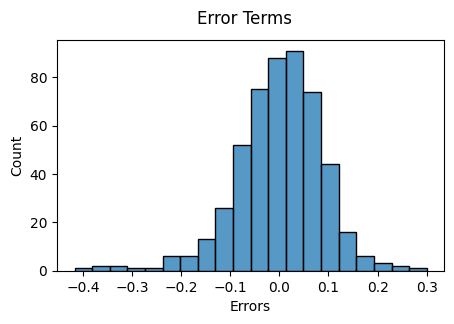

In [4203]:
# Plot the histogram of the error terms
fig = plt.figure(figsize=(5,3))
sns.histplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 12)                  # Plot heading 
plt.xlabel('Errors', fontsize = 10)                         # X-label

### <font color = 'red'> Conclusion: </font>

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

### 7.2 Checking the relation between y_train and y_pred

Text(0, 0.5, 'y_pred')

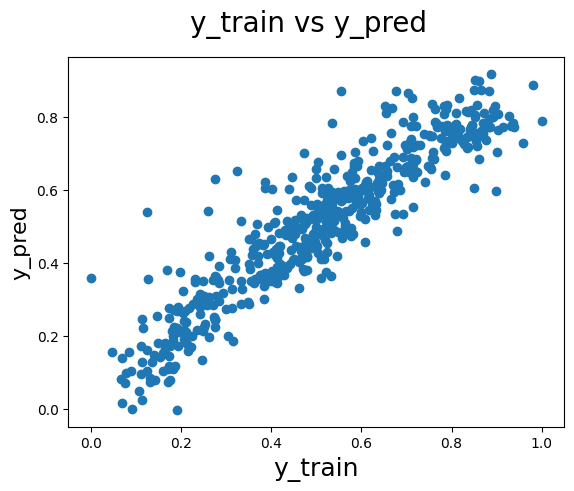

In [4206]:
fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### 7.3 Cross-verifying the above conclusion using a qq-plot as well:

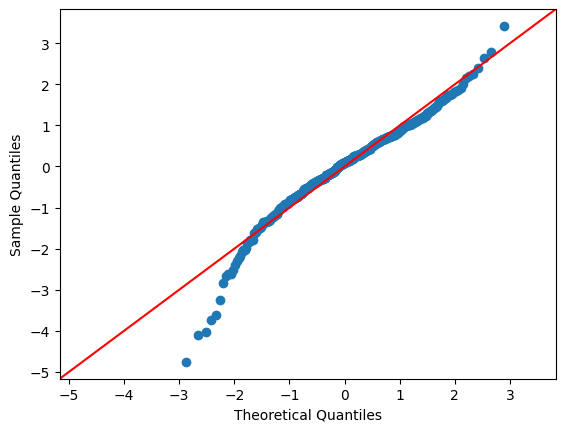

In [4208]:
# Plot the qq-plot of the error terms
sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

### <font color = 'red'> Conclusion: </font>

Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

## Step 8: Predictions and Evaluation using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

### 8.1 Apply the scaling on the test sets

In [4213]:
df_test[numeric_var] = scaler.transform(df_test[numeric_var])

In [4214]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_monday,weekday_saturday,weekday_sunday,weekday_thursday,weekday_tuesday,weekday_wednesday,weathersit_light rain,weathersit_misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 8.2 Dividing into X_test and y_test

In [4216]:
y_test = df_test.pop('cnt')
X_test = df_test

In [4217]:
# Adding constant variable to test dataframe

X_test_sm = sm.add_constant(X_test)

In [4218]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep', 'weekday_monday',
       'weekday_saturday', 'weekday_sunday', 'weekday_thursday',
       'weekday_tuesday', 'weekday_wednesday', 'weathersit_light rain',
       'weathersit_misty'],
      dtype='object')

In [4219]:
X_train_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weekday_saturday', 'weathersit_light rain',
       'weathersit_misty'],
      dtype='object')

In [4220]:
train_col = X_train_sm.columns
X_test_sm = X_test_sm[train_col[1:]]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test_sm)

X_test_sm.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed',
       'season_summer', 'season_winter', 'mnth_Dec', 'mnth_Jan', 'mnth_Jul',
       'mnth_Nov', 'mnth_Sep', 'weekday_saturday', 'weathersit_light rain',
       'weathersit_misty'],
      dtype='object')

### 8.3 Predictions using the final model

In [4222]:
y_test_pred = lm6.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

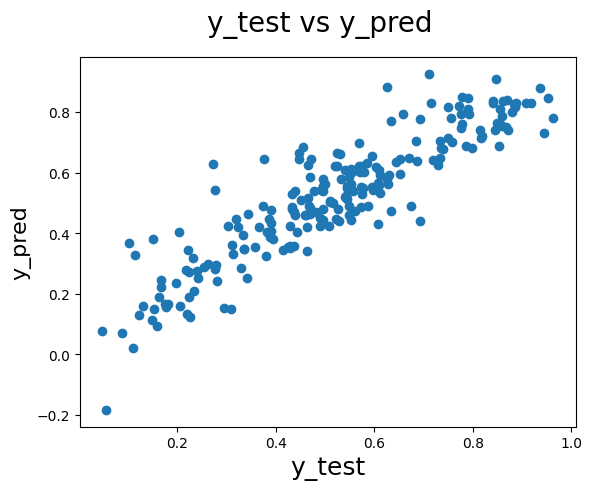

In [4223]:
# Plotting the graph for actual versus predicted values. Plotting y_test and y_pred to understand the spread
                  
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

### <font color = 'red'> Conclusion: </font> 
We can colude that the final model fit isn't by chance, and has descent predictive power.

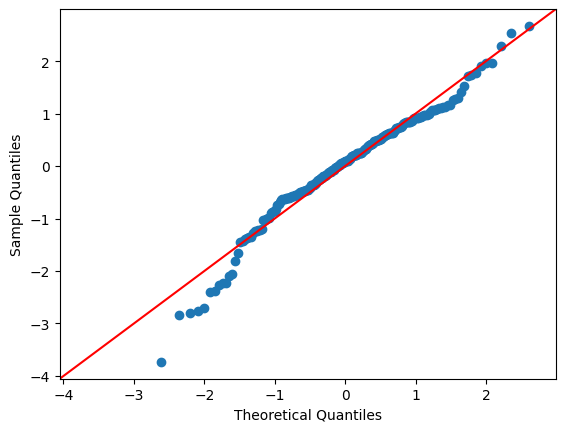

In [4225]:
# Plot the qq-plot of the error terms. Cross-verifying the above conclusion using a qq-plot as well:

sm.qqplot((y_test - y_test_pred), fit=True, line='45')
plt.show()

## Step 9:  Model Evaluation - Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [4227]:
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

0.8104202435274624

### <font color = 'red'> Conclusion: </font>

We can see that the `r_squared on the test set is 0.810` and the `r-squared on the trained set 0.847` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 10: Getting the variable names and the coefficient values for the final equation of the best fitted line

In [4230]:
param = pd.DataFrame(lm6.params)
param.insert(0,'Variables', param.index)
param.rename(columns = {0:'Coefficient value'}, inplace = True)
param['index'] = list(range(0, 16))
param.set_index('index', inplace = True)
param.sort_values(by = 'Coefficient value', ascending = False, inplace = True)
param

,Variables,Coefficient value
index,,
3,temp,0.548262
1,yr,0.229602
0,const,0.203573
7,season_winter,0.141175
12,mnth_Sep,0.085920
6,season_summer,0.072026
13,weekday_saturday,0.063454
2,workingday,0.052962
8,mnth_Dec,-0.035426


### <font color = 'red'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.2036 + 0.5482 \times  temp + 0.2296  \times  yr + 0.1412 \times season winter + 0.0859 \times mnth Sep + 0.072 \times season summer + 0.0634 \times weekday saturday + 0.0529 \times workingday - 0.0354 \times mnth Dec - 0.0363 \times mnth Nov - 0.0412 \times mnth Jul - 0.0566 \times mnth Jan - 0.0566 \times weathersit misty - 0.1581 \times hum - 0.1585 \times windspeed - 0.2503 \times weathersit light rain $

#### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
#### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.548262)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.30707)
 - year (0.229602)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

## <font color='red'> Final Recommendations for the Company: </font>

- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand